In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os, json
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.tree import export_graphviz 
import graphviz
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections
from sklearn.metrics import confusion_matrix
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle

In [2]:
Filetype=input('Load big file (1) or small file (2)? ')
if Filetype=='2' :
    data=pd.read_csv('data/Sdata_for_ML.csv',header=0)
else:
    data=pd.read_csv('data/Bdata_for_ML.csv',header=0)
data=data.drop(['Unnamed: 0',],axis=1)    

Load big file (1) or small file (2)? 1


# test

In [3]:
mod1=data.drop(['is_starred','usd_pledged','pledge_perc','staff_pick'],axis=1)
y=mod1.state_num
#df=mod1[imp]
df=mod1.drop(['state_num'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

C:\Users\elad.toister\AppData\Local\Continuum\anaconda3-1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\elad.toister\AppData\Local\Continuum\anaconda3-1\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Accuracy of the GBM on test set: 0.768
             precision    recall  f1-score   support

          0       0.75      0.70      0.72     14777
          1       0.78      0.82      0.80     19546

avg / total       0.77      0.77      0.77     34323



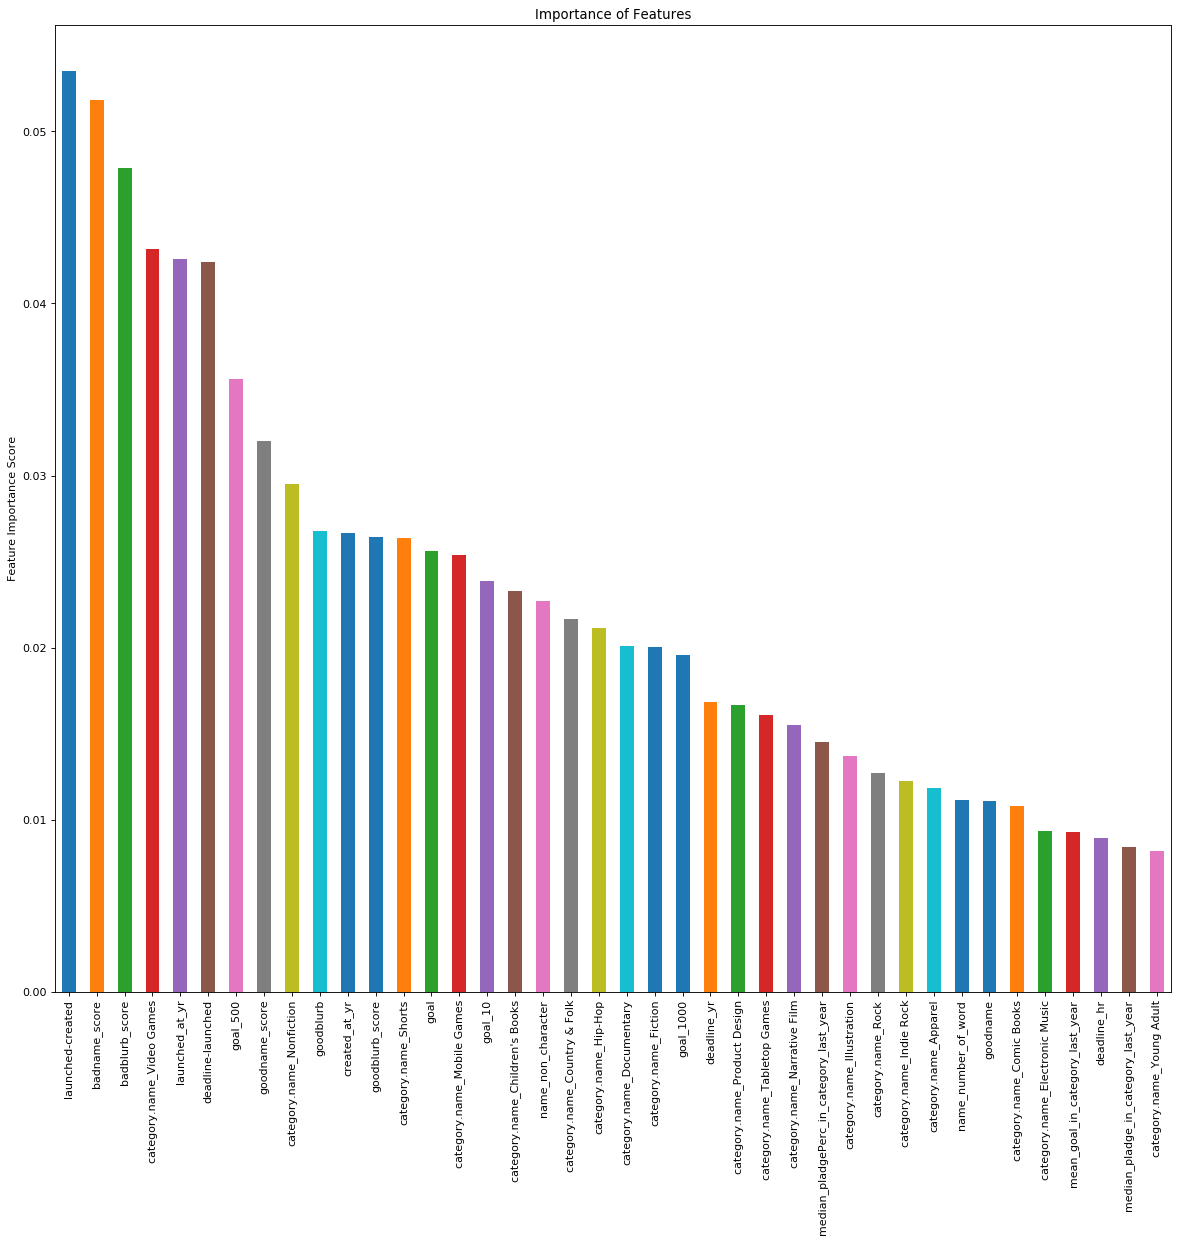

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[0:40].plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))


In [5]:
be=baseline.feature_importances_
be=pd.Series(be)
be=be.replace(0,0.00001)


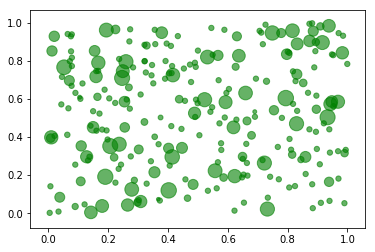

In [6]:
from matplotlib.pyplot import figure

i = np.random.rand(256)
y = np.random.rand(256)
z = np.sqrt(be)
z=np.sqrt(z)
# Change color with c and alpha
plt.scatter(i, y, z*500, c="Green", alpha=0.6)
#figure(num=None, figsize=(20, 8), dpi=80)
plt.savefig('fig2.png',dpi=200)
#plt.show()

In [7]:
imp=feat_imp.nlargest(70).index.values.tolist()
feat_imp.nlargest(70)

launched-created                           0.053489
badname_score                              0.051841
badblurb_score                             0.047845
category.name_Video Games                  0.043136
launched_at_yr                             0.042574
deadline-launched                          0.042398
goal_500                                   0.035602
goodname_score                             0.032011
category.name_Nonfiction                   0.029511
goodblurb                                  0.026750
created_at_yr                              0.026636
goodblurb_score                            0.026432
category.name_Shorts                       0.026391
goal                                       0.025627
category.name_Mobile Games                 0.025385
goal_10                                    0.023857
category.name_Children's Books             0.023317
name_non_character                         0.022699
category.name_Country & Folk               0.021654
category.nam

In [8]:
pickle.dump(imp, open("imp.dat", "wb")) # wb = write binary

In [9]:
imp = pickle.load(open("imp.dat", "rb"))

In [10]:
len(data[data['launched_at_yr']>2016])/len(data)

0.18255133673635876

In [11]:
mod1=data.drop(['is_starred','usd_pledged','pledge_perc','staff_pick'],axis=1)
y=mod1.state_num
df=mod1[imp]

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
#test=mod1[mod1['launched_at_yr']>2017]
#train=mod1[mod1['launched_at_yr']<=2017]
#X_train=train[imp]
#X_test=test[imp]
#y_train=train['state_num']
#y_test=test['state_num']
#X_test.columns

Accuracy of the GBM on test set: 0.796
             precision    recall  f1-score   support

          0       0.76      0.77      0.77     14926
          1       0.82      0.81      0.82     19397

avg / total       0.80      0.80      0.80     34323



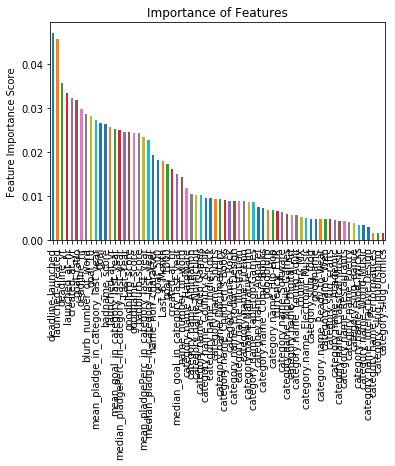

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

(0, 1)

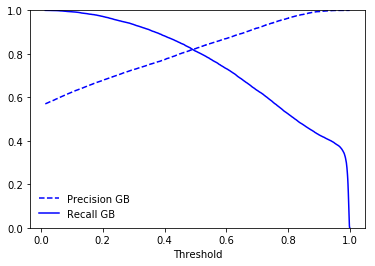

In [13]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision "+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall "+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])
    
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
y_gb_proba = baseline.predict_proba(X_test)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_gb_proba[:,1])
precisions_GB, recalls_GB, thresholds_GB = precision_recall_curve(y_true = y_test, probas_pred = y_gb_proba[:,1])
#precisions, recalls, thresholds = precision_recall_curve(y_true = y_test, probas_pred =pred)
plt.plot (thresholds_GB, precisions_GB[:-1], "b"+"--", label="Precision GB")
plt.plot (thresholds_GB, recalls_GB[:-1], "b"+"-", label="Recall GB")
plt.xlabel("Threshold")
plt.legend(frameon=False)
plt.ylim([0,1])


In [14]:

p_test2 = {'max_depth':[7,8,15,20] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=100, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.75364, std: 0.00174, params: {'max_depth': 7},
  mean: 0.76005, std: 0.00196, params: {'max_depth': 8},
  mean: 0.78587, std: 0.00235, params: {'max_depth': 15},
  mean: 0.79113, std: 0.00159, params: {'max_depth': 20}],
 {'max_depth': 20},
 0.7911340474227387)

In [15]:
print(len(mod1))
corr_df=mod1.corr()
cor_st=corr_df.loc['state_num']
#print([cor_st.nsmallest(50)])
#print([cor_st.nlargest(50)])

171612


In [16]:
small=cor_st.nsmallest(50)
big=cor_st.nlargest(50)
small=small.index.values.tolist()
big=big.index.values.tolist()
mod1_columns=big+small
print(mod1_columns)

['state_num', 'goodblurb', 'goodblurb_score', 'badblurb_score', 'goodname', 'median_pladgePerc_in_category_last_year', 'goodname_score', 'name_non_character', 'badname_score', 'name_number_of_word', 'name_len', 'category.name_Product Design', 'category.name_Shorts', 'category.name_Tabletop Games', 'category.name_Documentary', 'median_pladge_in_category_last_year', 'category.name_Indie Rock', 'category.name_Nonfiction', 'category.name_Fiction', 'category.name_Video Games', 'category.name_Rock', 'category.slug_publishing', 'category.name_Country & Folk', "category.name_Children's Books", 'country_US', 'currency_USD', 'category.slug_music', 'category.name_Comic Books', 'category.name_Illustration', 'category.name_Narrative Film', 'category.slug_comics', 'mean_pladgePerc_in_category_last_year', 'Last_Year', 'category.slug_design', 'Last_6_Month', 'name_is_exclamation', 'category.name_Apparel', 'category.slug_games', 'category.name_Webseries', 'category.name_Accessories', 'category.name_Per

In [17]:
mod1=data[mod1_columns]


In [18]:
mod1_params= mod1.columns.drop('state_num')

In [19]:
Dtree_Params=mod1_params
train_df, test_df= train_test_split (mod1, test_size = 0.2, random_state=6)
Y_train = train_df["state_num"]
X_train = train_df[Dtree_Params]
Y_test=test_df["state_num"]
X_test=test_df[Dtree_Params]
tree_clf = DecisionTreeClassifier (max_depth =100)
tree_clf.fit (X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision Tree visualization

In [20]:
# Run the test set through the decision tree
Y2_test_Tree_predict = tree_clf.predict (X_test)  

#Test set conf matrix
conf_matrix_Testdata = confusion_matrix(Y_test, Y2_test_Tree_predict) 
print('Test set conf matrix is',conf_matrix_Testdata)

#Train set conf. matrix
conf_matrix_Traindata = confusion_matrix(Y_train, tree_clf.predict (X_train)) 
print('Train set conf matrix is',conf_matrix_Traindata)

from sklearn.metrics import precision_score, recall_score

print("The recall for the train set is ",recall_score(Y_train, tree_clf.predict (X_train)))
print("The recall for the test set tree is ",recall_score(Y_test, Y2_test_Tree_predict))
print("The precision for the train set tree is ",precision_score(Y_train, tree_clf.predict (X_train)))
print("The precision for the test tree is ",precision_score(Y_test, Y2_test_Tree_predict))

Y_test_proba = tree_clf.predict_proba(X_test)
print('Y_test_proba[:,1] is',Y_test_proba[:,1])

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])
#print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

Test set conf matrix is [[ 9956  4895]
 [ 4189 15283]]
Train set conf matrix is [[59511     0]
 [    1 77777]]
The recall for the train set is  0.999987142894
The recall for the test set tree is  0.784870583402
The precision for the train set tree is  1.0
The precision for the test tree is  0.757409059372
Y_test_proba[:,1] is [ 0.  1.  0. ...,  1.  0.  0.]


## Precision plot graph 

In [21]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision "+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall "+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])

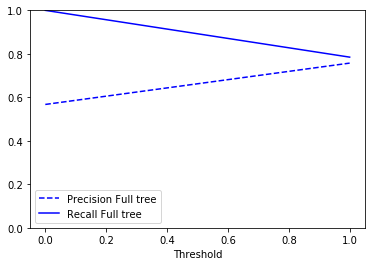

In [22]:
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="Full tree")
plt.legend(loc = "best")

## Tree ML

In [23]:
mod1=data.drop(['is_starred','usd_pledged','pledge_perc','staff_pick','mean_pladge_in_category_last_year',
       'median_pladge_in_category_last_year',
       'mean_pladgePerc_in_category_last_year',
       'median_pladgePerc_in_category_last_year','category.name_3D Printing', 'category.name_Academic',
       'category.name_Accessories', 'category.name_Action',
       'category.name_Animals', 'category.name_Animation',
       'category.name_Anthologies', 'category.name_Apparel',
       'category.name_Apps', 'category.name_Architecture',
       'category.name_Art Books', 'category.name_Audio', 'category.name_Bacon',
       'category.name_Blues', 'category.name_Calendars',
       'category.name_Camera Equipment', 'category.name_Candles',
       'category.name_Ceramics', 'category.name_Children\'s Books',
       'category.name_Childrenswear', 'category.name_Chiptune',
       'category.name_Civic Design', 'category.name_Classical Music',
       'category.name_Comedy', 'category.name_Comic Books',
       'category.name_Community Gardens', 'category.name_Conceptual Art',
       'category.name_Cookbooks', 'category.name_Country & Folk',
       'category.name_Couture', 'category.name_Crochet', 'category.name_DIY',
       'category.name_DIY Electronics', 'category.name_Digital Art',
       'category.name_Documentary', 'category.name_Drama',
       'category.name_Drinks', 'category.name_Electronic Music',
       'category.name_Embroidery', 'category.name_Events',
       'category.name_Experimental', 'category.name_Fabrication Tools',
       'category.name_Faith', 'category.name_Family', 'category.name_Fantasy',
       'category.name_Farmer\'s Markets', 'category.name_Farms',
       'category.name_Festivals', 'category.name_Fiction',
       'category.name_Fine Art', 'category.name_Flight',
       'category.name_Food Trucks', 'category.name_Footwear',
       'category.name_Gadgets', 'category.name_Gaming Hardware',
       'category.name_Glass', 'category.name_Graphic Design',
       'category.name_Graphic Novels', 'category.name_Hardware',
       'category.name_Hip-Hop', 'category.name_Horror',
       'category.name_Illustration', 'category.name_Immersive',
       'category.name_Indie Rock', 'category.name_Installations',
       'category.name_Interactive Design', 'category.name_Jazz',
       'category.name_Jewelry', 'category.name_Kids', 'category.name_Knitting',
       'category.name_Latin', 'category.name_Letterpress',
       'category.name_Literary Journals', 'category.name_Literary Spaces',
       'category.name_Live Games', 'category.name_Makerspaces',
       'category.name_Metal', 'category.name_Mixed Media',
       'category.name_Mobile Games', 'category.name_Movie Theaters',
       'category.name_Music Videos', 'category.name_Musical',
       'category.name_Narrative Film', 'category.name_Nature',
       'category.name_Nonfiction', 'category.name_Painting',
       'category.name_People', 'category.name_Performance Art',
       'category.name_Performances', 'category.name_Periodicals',
       'category.name_Pet Fashion', 'category.name_Photo',
       'category.name_Photobooks', 'category.name_Places','category.name_Playing Cards', 'category.name_Plays',
       'category.name_Poetry', 'category.name_Pop', 'category.name_Pottery',
       'category.name_Print', 'category.name_Printing',
       'category.name_Product Design', 'category.name_Public Art',
       'category.name_Punk', 'category.name_Puzzles', 'category.name_Quilts',
       'category.name_R&B', 'category.name_Radio & Podcasts',
       'category.name_Ready-to-wear', 'category.name_Residencies',
       'category.name_Restaurants', 'category.name_Robots',
       'category.name_Rock', 'category.name_Romance',
       'category.name_Science Fiction', 'category.name_Sculpture',
       'category.name_Shorts', 'category.name_Small Batch',
       'category.name_Software', 'category.name_Sound',
       'category.name_Space Exploration', 'category.name_Spaces',
       'category.name_Stationery', 'category.name_Tabletop Games',
       'category.name_Taxidermy', 'category.name_Television',
       'category.name_Textiles', 'category.name_Thrillers',
       'category.name_Translations', 'category.name_Typography',
       'category.name_Vegan', 'category.name_Video', 'category.name_Video Art',
       'category.name_Video Games', 'category.name_Wearables',
       'category.name_Weaving', 'category.name_Web', 'category.name_Webcomics',
       'category.name_Webseries', 'category.name_Woodworking',
       'category.name_Workshops', 'category.name_World Music',
       'category.name_Young Adult', 'category.name_Zines','country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG','currency_AUD',
       'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR',
       'currency_GBP', 'currency_HKD', 'currency_JPY', 'currency_MXN',
       'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_SGD','launched_at_day_in_week_1',
       'launched_at_day_in_week_2', 'launched_at_day_in_week_3',
       'launched_at_day_in_week_4', 'launched_at_day_in_week_5',
       'launched_at_day_in_week_6', 'launched_at_day_in_week_7',
       'deadline_day_in_week_1', 'deadline_day_in_week_2',
       'deadline_day_in_week_3', 'deadline_day_in_week_4',
       'deadline_day_in_week_5', 'deadline_day_in_week_6',
       'deadline_day_in_week_7','name_len','name_is_question',
           'name_is_exclamation','name_is_upper','name_non_character',
           'name_number_of_word','name_vowel_ratio','blurb_number_of_word',
           'blurb_vowel_ratio','blurb_non_character','goodname','goodblurb'],axis=1)


In [24]:
mod1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171612 entries, 0 to 171611
Data columns (total 49 columns):
goal                                 171612 non-null float64
launched_at_hr                       171612 non-null int64
launched_at_day_in_month             171612 non-null int64
launched_at_mo                       171612 non-null int64
launched_at_yr                       171612 non-null int64
deadline_hr                          171612 non-null int64
deadline_day_in_month                171612 non-null int64
deadline_mo                          171612 non-null int64
deadline_yr                          171612 non-null int64
created_at_hr                        171612 non-null int64
created_at_day_in_week               171612 non-null int64
created_at_day_in_month              171612 non-null int64
created_at_mo                        171612 non-null int64
created_at_yr                        171612 non-null int64
launched-created                     171612 non-null int64
go

In [25]:
print(len(mod1))
corr_df=mod1.corr()
cor_st=corr_df.loc['state_num']
print([cor_st.nsmallest(50)])
print([cor_st.nlargest(50)])


171612
[goal                                -0.226695
deadline_yr                         -0.189162
created_at_yr                       -0.188553
launched_at_yr                      -0.186114
median_goal_in_category_last_year   -0.178451
category.slug_food                  -0.172964
mean_goal_in_category_last_year     -0.133788
category.slug_technology            -0.125430
category.slug_crafts                -0.096475
category.slug_journalism            -0.081538
deadline-launched                   -0.081511
deadline_hr                         -0.071423
category.slug_photography           -0.057910
goal_1000                           -0.033688
goal_500                            -0.033670
goal_10                             -0.033661
deadline_day_in_month               -0.021872
created_at_mo                       -0.021846
created_at_day_in_week              -0.021734
launched_at_mo                      -0.015750
launched_at_hr                      -0.015540
launched_at_day_in_month  

In [26]:
print(cor_st.nsmallest(50).index)
print('')
print(cor_st.nlargest(50).index)

Index(['goal', 'deadline_yr', 'created_at_yr', 'launched_at_yr',
       'median_goal_in_category_last_year', 'category.slug_food',
       'mean_goal_in_category_last_year', 'category.slug_technology',
       'category.slug_crafts', 'category.slug_journalism', 'deadline-launched',
       'deadline_hr', 'category.slug_photography', 'goal_1000', 'goal_500',
       'goal_10', 'deadline_day_in_month', 'created_at_mo',
       'created_at_day_in_week', 'launched_at_mo', 'launched_at_hr',
       'launched_at_day_in_month', 'deadline_mo', 'category.slug_fashion',
       'created_at_day_in_month', 'category.slug_art', 'category.slug_theater',
       'Last_Week', 'goal_ratio', 'created_at_hr', 'launched-created',
       'Last_Month', 'category.slug_film & video', 'category.slug_dance',
       'Last_3_Month', 'category.slug_games', 'Last_6_Month',
       'category.slug_design', 'Last_Year', 'category.slug_comics',
       'category.slug_music', 'currency_USD', 'country_US',
       'category.slug_pu

In [27]:
mod1_params= mod1.columns.drop('state_num')

In [28]:
Dtree_Params=mod1_params
train_df, test_df= train_test_split (mod1, test_size = 0.2, random_state=6)
Y_train = train_df["state_num"]
X_train = train_df[Dtree_Params]
Y_test=test_df["state_num"]
X_test=test_df[Dtree_Params]
tree_clf = DecisionTreeClassifier (max_depth =15)
tree_clf.fit (X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision Tree visualization

In [29]:
# Run the test set through the decision tree
Y2_test_Tree_predict = tree_clf.predict (X_test)  

#Test set conf matrix
conf_matrix_Testdata = confusion_matrix(Y_test, Y2_test_Tree_predict) 
print('Test set conf matrix is',conf_matrix_Testdata)

#Train set conf. matrix
conf_matrix_Traindata = confusion_matrix(Y_train, tree_clf.predict (X_train)) 
print('Train set conf matrix is',conf_matrix_Traindata)

from sklearn.metrics import precision_score, recall_score

print("The recall for the train set is ",recall_score(Y_train, tree_clf.predict (X_train)))
print("The recall for the test set tree is ",recall_score(Y_test, Y2_test_Tree_predict))
print("The precision for the train set tree is ",precision_score(Y_train, tree_clf.predict (X_train)))
print("The precision for the test tree is ",precision_score(Y_test, Y2_test_Tree_predict))

Y_test_proba = tree_clf.predict_proba(X_test)
print('Y_test_proba[:,1] is',Y_test_proba[:,1])

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])
#print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

Test set conf matrix is [[ 9485  5366]
 [ 4213 15259]]
Train set conf matrix is [[46678 12833]
 [ 9290 68488]]
The recall for the train set is  0.880557484121
The recall for the test set tree is  0.783638044371
The precision for the train set tree is  0.842193283408
The precision for the test tree is  0.73983030303
Y_test_proba[:,1] is [ 0.19230769  0.7         0.94956522 ...,  0.76727273  0.66666667
  0.88181818]


## Precision plot graph 

In [30]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision "+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall "+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])

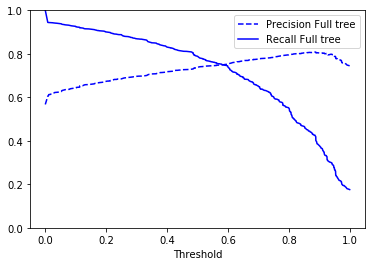

In [31]:
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="Full tree")
plt.legend(loc = "best")

In [32]:
#הזזת טרשהולד
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
y_pred_Set_T = binarize(Y_test_proba, 0.7)


conf_matrix = confusion_matrix(Y_test, y_pred_Set_T[:,1])
print(conf_matrix)

print(recall_score(Y_test, y_pred_Set_T[:,1]))

print(precision_score(Y_test, y_pred_Set_T[:,1]))

[[11197  3654]
 [ 6822 12650]]
0.649650780608
0.775883218842


## Roc Curve Plotting

In [33]:
from sklearn.metrics import roc_curve

In [34]:
Y_test_proba=y_pred_Set_T
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_proba[:,1])


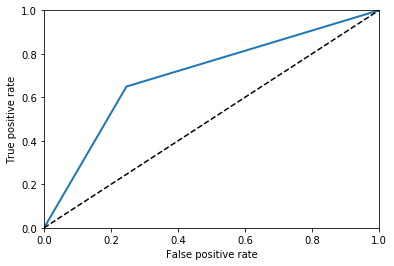

In [35]:
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
plot_roc_curve (fpr, tpr, "Full tree")
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
print("AUC for random guess is:   ", 0.5 )
print("AUC for the Full tree is: ", roc_auc_score(Y_test, Y_test_proba[:,1]) )

AUC for random guess is:    0.5
AUC for the Full tree is:  0.701803371585


## Random forest (RF)

In [37]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 250, max_depth = 10, n_jobs= -1)
rnd_clf.fit (X_train, Y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [38]:
confusion_matrix(Y_test, y_pred_rf)

array([[ 9745,  5106],
       [ 3505, 15967]], dtype=int64)

In [39]:
recall_score(Y_test, y_pred_rf)

0.81999794576828267

In [40]:
precision_score(Y_test, y_pred_rf)

0.75769942580553318


y_pred_Set_rf = binarize(y_pred_rf, 0.6)

conf_matrix = confusion_matrix(Y_test, y_pred_Set_rf)

#print(conf_matrix)

#print(recall_score(Y_test, y_pred_Set_rf))

#print(precision_score(Y_test, y_pred_Set_rf))


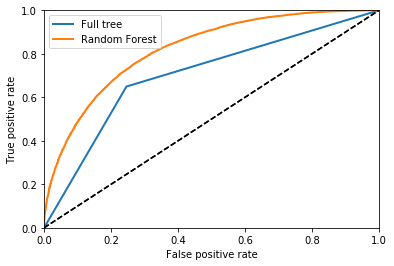

In [41]:
y_rf_proba = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_rf_proba[:,1])
plot_roc_curve (fpr, tpr, "Full tree")
plot_roc_curve (fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc = "best")
plt.show()

In [42]:
roc_auc_score(Y_test, y_rf_proba[:,1])

0.82142175409118701

In [43]:
feature_score = rnd_clf.feature_importances_
feature_score

array([ 0.04402351,  0.00624458,  0.00411786,  0.00364359,  0.09056692,
        0.00642336,  0.00394462,  0.00351913,  0.08624884,  0.00387022,
        0.00247551,  0.00403439,  0.00356842,  0.08028465,  0.07235733,
        0.03595051,  0.04248504,  0.048659  ,  0.0007824 ,  0.00154118,
        0.0104991 ,  0.00320554,  0.00731909,  0.02384089,  0.02495264,
        0.01453578,  0.02368279,  0.09057085,  0.04634312,  0.06513966,
        0.09487849,  0.0077147 ,  0.00429484,  0.00593426,  0.00173157,
        0.00290339,  0.00076145,  0.00238264,  0.00863721,  0.00187789,
        0.00108213,  0.00213781,  0.00068079,  0.00208344,  0.0037242 ,
        0.00030817,  0.00197505,  0.00206145])

In [44]:
feature_names = list(X_train)
df_feature_score = pd.DataFrame(data=feature_names, columns=["feature"])
df_feature_score["score"]= feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)
df_feature_score.head(30)
df_feature_score_short=df_feature_score.drop(df_feature_score.index[12:])
df_feature_score_short

,feature,score
30,goodname_score,0.094878
27,badblurb_score,0.090571
4,launched_at_yr,0.090567
8,deadline_yr,0.086249
13,created_at_yr,0.080285
14,launched-created,0.072357
29,goodblurb_score,0.065140
17,goal_10,0.048659
28,badname_score,0.046343
0,goal,0.044024


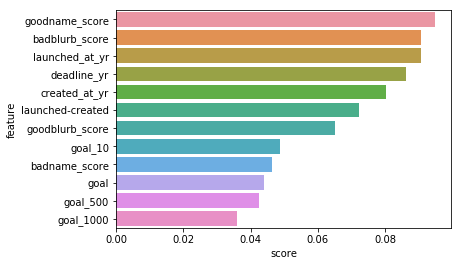

In [45]:
sns.barplot(y="feature", x="score", data=df_feature_score_short)

In [46]:
Dtree_Params=mod1_params
train_df, test_df= train_test_split (mod1, test_size = 0.2, random_state=6)
Y_train = train_df["state_num"]
X_train = train_df[Dtree_Params]
Y_test=test_df["state_num"]
X_test=test_df[Dtree_Params]
tree_clf = DecisionTreeClassifier (max_depth = 3)
tree_clf.fit (X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
from sklearn.model_selection import validation_curve

param_range = (3,5,10,30)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(n_estimators=250), 
                                             X_train,
                                             Y_train.ravel(),
                                             param_name="max_depth", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

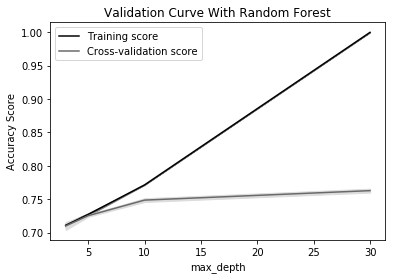

In [48]:
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("max_depth")
plt.ylabel("Accuracy Score")
#plt.tight_layout()
plt.legend(loc="best")
plt.show()

## GBM

In [49]:
from sklearn import ensemble

clf_gb = ensemble.GradientBoostingClassifier()
clf_gb.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [50]:
y_pred_gb = clf_gb.predict(X_test)

In [51]:
confusion_matrix(Y_test, y_pred_gb)

array([[ 9760,  5091],
       [ 3402, 16070]], dtype=int64)

In [52]:
recall_score(Y_test, y_pred_gb)

0.82528759244042726

In [54]:
precision_score(Y_test, y_pred_gb)

0.75941590662067016

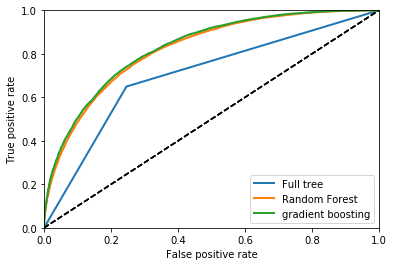

In [55]:
y_gb_proba = clf_gb.predict_proba(X_test)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(Y_test, y_gb_proba[:,1])

y_rf_proba = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_rf_proba[:,1])
plot_roc_curve (fpr, tpr, "Full tree")
plot_roc_curve (fpr_rf, tpr_rf, "Random Forest")
plot_roc_curve (fpr_gb, tpr_gb, "gradient boosting")
plt.legend(loc = "best")
plt.show()

## Precision graph plots for all methods

(0, 1)

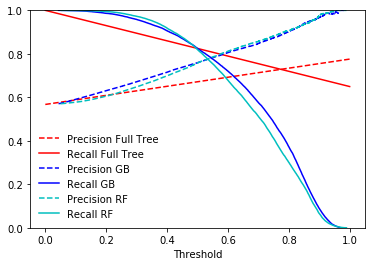

In [56]:
precisions_GB, recalls_GB, thresholds_GB = precision_recall_curve(y_true = Y_test, probas_pred = y_gb_proba[:,1])
precisions_RF, recalls_RF, thresholds_RF = precision_recall_curve(y_true = Y_test, probas_pred = y_rf_proba[:,1])
precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])

plt.plot (thresholds, precisions[:-1], "r"+"--", label="Precision Full Tree")
plt.plot (thresholds, recalls[:-1], "r"+"-", label="Recall Full Tree ")
plt.plot (thresholds_GB, precisions_GB[:-1], "b"+"--", label="Precision GB")
plt.plot (thresholds_GB, recalls_GB[:-1], "b"+"-", label="Recall GB")
plt.plot (thresholds_RF, precisions_RF[:-1], "c"+"--", label="Precision RF")
plt.plot (thresholds_RF, recalls_RF[:-1], "c"+"-", label="Recall RF")

plt.xlabel("Threshold")
plt.legend(frameon=False)
plt.ylim([0,1])


## Prepare data for Regression

In [57]:
# Linear Regression imports
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score
lin_reg = LinearRegression()
from sklearn.metrics import mean_squared_error

In [58]:
#define range of data
data_r=data[data['pledge_perc']<400]
data_r=data_r[data_r['pledge_perc']>100]
data_r=data_r[data_r['usd_pledged']>=8000]
data_r=data_r[data_r['usd_pledged']<=100000]

In [59]:
data_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27184 entries, 1 to 171584
Columns: 261 entries, is_starred to deadline_day_in_week_7
dtypes: bool(2), float64(20), int64(239)
memory usage: 54.0 MB


# Polynomial Regression

# model 1-Conservative prediction 


In [60]:
#define range of data
data_r=data[data['pledge_perc']>100]
data_r=data_r[data_r['pledge_perc']<250]
data_r=data_r[data_r['usd_pledged']>=1000]
data_r=data_r[data_r['usd_pledged']<=80000]
print(len(data_r))
corr_df=data_r.corr()
cor_st=corr_df.loc['usd_pledged']
print(cor_st.nsmallest(15).index)
print('')
print(cor_st.nlargest(25).index)

66001
Index(['goal_ratio', 'category.slug_music', 'category.slug_art',
       'median_pladgePerc_in_category_last_year', 'category.name_Shorts',
       'category.slug_publishing', 'category.name_Indie Rock',
       'category.name_Rock', 'category.name_Fiction',
       'category.name_Comic Books', 'category.name_Performance Art',
       'category.name_Country & Folk', 'category.name_Painting',
       'category.name_Performances', 'category.slug_theater'],
      dtype='object')

Index(['usd_pledged', 'goal_500', 'goal_10', 'goal_1000', 'goal', 'staff_pick',
       'mean_pladge_in_category_last_year',
       'median_goal_in_category_last_year', 'category.slug_technology',
       'mean_goal_in_category_last_year', 'category.name_Hardware',
       'category.name_Product Design', 'category.name_Gadgets',
       'launched_at_yr', 'deadline_yr', 'category.name_Video Games',
       'category.slug_games', 'created_at_yr', 'category.slug_food',
       'launched-created', 'category.slug_design', '

0.933654611304


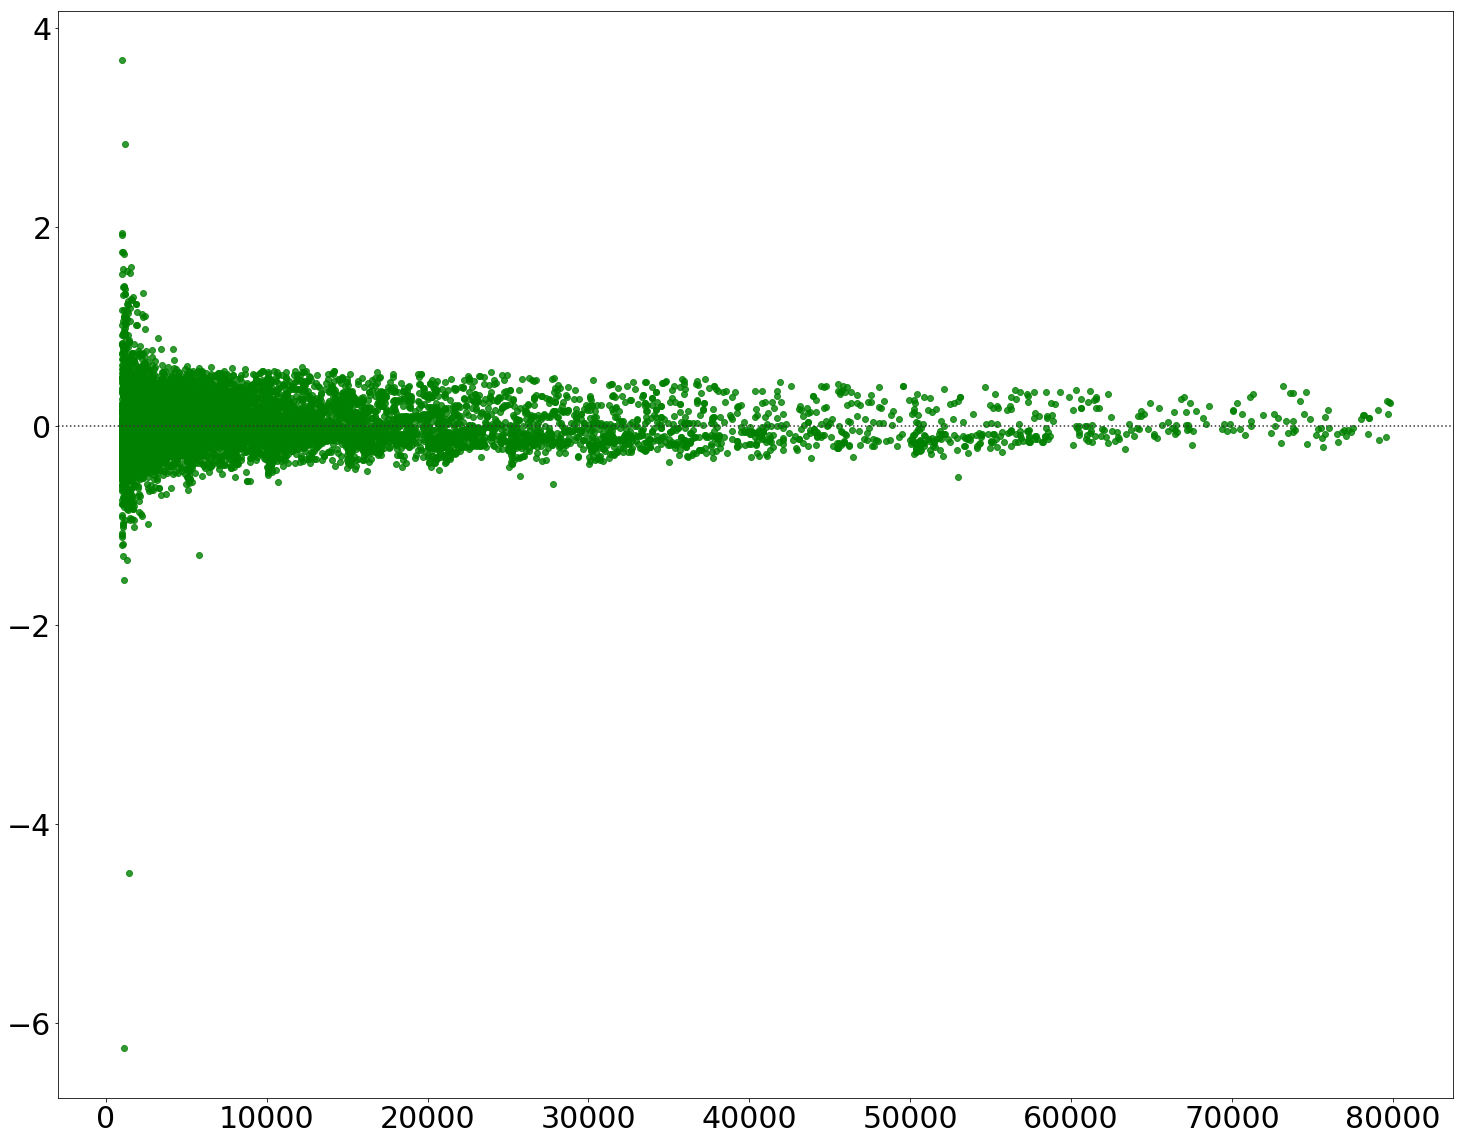

In [61]:
#define parameters for regression
y = data_r [['usd_pledged']]
X = data_r[['country_GB',
       'Last_Week','Last_Month',
       'Last_Year','Last_6_Month',
       'mean_goal_in_category_last_year',
       'median_goal_in_category_last_year',
       'mean_pladge_in_category_last_year',
       'median_pladge_in_category_last_year',
       'mean_pladgePerc_in_category_last_year',
       'median_pladgePerc_in_category_last_year',
       'goal_ratio',
       'name_len','deadline_yr', 'launched_at_yr',
       'name_non_character', 'goal',
       'deadline_hr', 'goal_1000','country_US', 'launched-created',
       'category.slug_music','category.slug_design','category.slug_technology','category.name_Science Fiction', 
       'category.slug_publishing', 'blurb_number_of_word', 'blurb_vowel_ratio']]
#split to train and test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state=8)

# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=2)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)

# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_train_p, y_train)

# Obtain coefficients
#lg.coef_

# Predict
y_test_pred_numeric_p=lg.predict(X_test_p)

print(r2_score(y_test, y_test_pred_numeric_p))

plt.subplots(figsize=(25,20))
ax= sns.residplot(y_test, (y_test-y_test_pred_numeric_p)/y_test, color="g")
sns.set_context("poster", rc={"font.size":50,"axes.titlesize":50,"axes.labelsize":50,'xtick.labelsize': 30.0})
#ax.set(xlabel='Y-test', ylabel='Residual% = (Y-predicted - Y-test)/Y-Test',title="Pledge prediction")
plt.tick_params(axis='both', labelsize=30)

In [62]:
X_train = X_train.values
y_train = y_train.values
X_test  =X_test.values
y_test  =y_test.values

In [63]:
from sklearn.ensemble import RandomForestRegressor #In classification we used RandomForestClassifier

rnd_clf = RandomForestRegressor(n_estimators = 100, max_depth = 9, n_jobs= -1)
rnd_clf.fit (X_train, y_train.ravel())
y_pred_rf = rnd_clf.predict(X_test)

In [64]:
mean_squared_error(y_test, y_pred_rf)

9109314.6414280068

In [65]:
rnd_clf.score(X_test, y_test)

0.93700566531665863

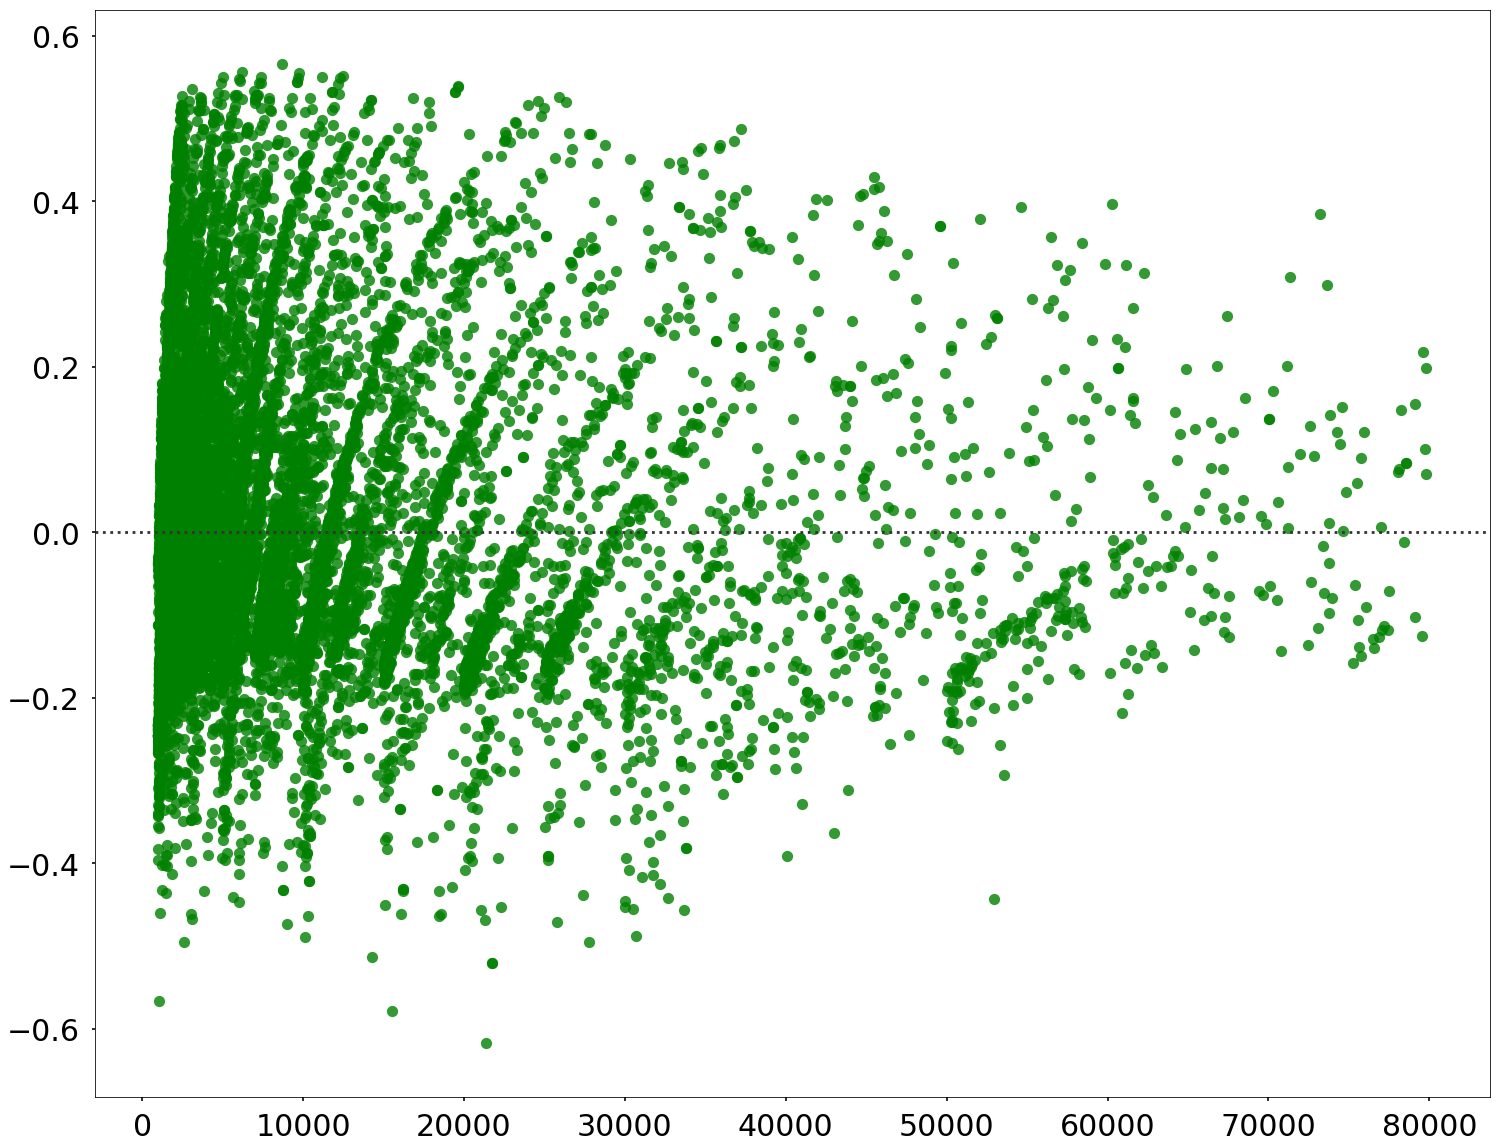

In [66]:
plt.subplots(figsize=(25,20))
ax= sns.residplot(y_test.ravel(), (y_test.ravel()-y_pred_rf)/y_test.ravel(), color="g")
sns.set_context("poster", rc={"font.size":50,"axes.titlesize":50,"axes.labelsize":50,'xtick.labelsize': 30.0})
#ax.set(xlabel='Y-test', ylabel='Residual% = (Y-predicted - Y-test)/Y-Test',title="Pledge prediction")
plt.tick_params(axis='both', labelsize=30)

In [67]:
from sklearn.model_selection import validation_curve

param_range = [5, 6, 7, 8, 9,20]     #These are the examined values to max_depth
train_scores, test_scores = validation_curve (estimator=RandomForestRegressor(n_estimators=50), 
                                              X=X_train, y=y_train.ravel(), 
                                              param_name='max_depth', param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1) # Vector of average scores
test_mean  = np.mean(test_scores, axis=1)
train_std  = np.std (train_scores, axis=1) # Vector of standard derivation
test_std   = np.std (test_scores, axis=1)


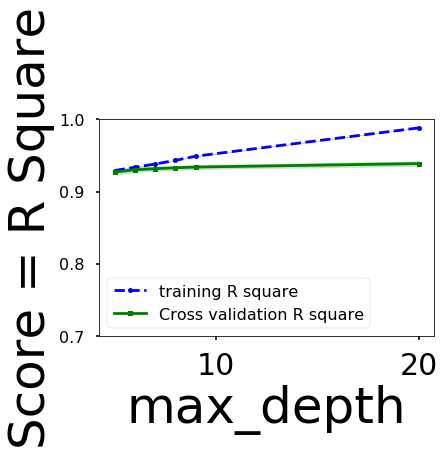

In [68]:
plt.plot(param_range, train_mean, color = 'blue', linestyle = '--', marker = 'o', markersize=5, label='training R square')
plt.plot(param_range, test_mean,color = 'green', marker = 's', markersize=5, label='Cross validation R square')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha = 0.2, color='blue')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.2, color='green')
plt.ylabel ('Score = R Square')
plt.ylim([0.7,1])
plt.xlabel ('max_depth')
plt.legend()

In [69]:
rnd_clf.feature_importances_


array([  6.77565134e-03,   2.70831783e-04,   3.44543236e-04,
         5.74179619e-04,   6.66157177e-04,   4.10546917e-04,
         3.20573407e-04,   4.70452150e-03,   5.83328911e-04,
         1.45645843e-03,   1.44379058e-03,   7.41932055e-04,
         1.24794001e-03,   6.57833599e-04,   6.07812007e-04,
         1.15762674e-03,   8.58585583e-01,   1.34533775e-03,
         1.11730895e-01,   1.24828242e-03,   2.14179700e-03,
         3.44976139e-05,   1.98451767e-04,   1.12030416e-03,
         1.69426445e-05,   5.87514697e-05,   7.86454134e-04,
         7.68975388e-04])

In [70]:
feature_score = rnd_clf.feature_importances_
df_feature_score = pd.DataFrame(data=X.columns, columns=["feature"])
df_feature_score["score"]= feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)
df_feature_score

,feature,score
16,goal,0.858586
18,goal_1000,0.111731
0,country_GB,0.006776
7,mean_pladge_in_category_last_year,0.004705
20,launched-created,0.002142
9,mean_pladgePerc_in_category_last_year,0.001456
10,median_pladgePerc_in_category_last_year,0.001444
17,deadline_hr,0.001345
19,country_US,0.001248
12,name_len,0.001248


# model 2- Risky prediction 


72463
Index(['goal_ratio', 'category.slug_music', 'category.slug_art',
       'median_pladgePerc_in_category_last_year', 'category.slug_publishing',
       'category.name_Shorts', 'category.name_Indie Rock',
       'category.name_Rock', 'category.name_Fiction',
       'category.name_Comic Books', 'category.name_Country & Folk',
       'blurb_number_of_word', 'blurb_vowel_ratio', 'category.name_Painting',
       'category.slug_theater'],
      dtype='object')

Index(['usd_pledged', 'goal_1000', 'goal_500', 'goal_10', 'goal',
       'mean_pladge_in_category_last_year',
       'median_goal_in_category_last_year', 'category.slug_technology',
       'staff_pick', 'pledge_perc', 'mean_goal_in_category_last_year',
       'category.name_Hardware', 'category.name_Product Design',
       'category.name_Gadgets', 'category.slug_games', 'category.slug_design',
       'category.name_Video Games', 'launched_at_yr', 'deadline_yr',
       'launched-created', 'deadline-launched', 'created_at_yr',
     

[Text(0,0.5,'Residual% = (Y-predicted - Y-test)/Y-Test'),
 Text(0.5,0,'Y-test'),
 Text(0.5,1,'Polynomial Regression')]

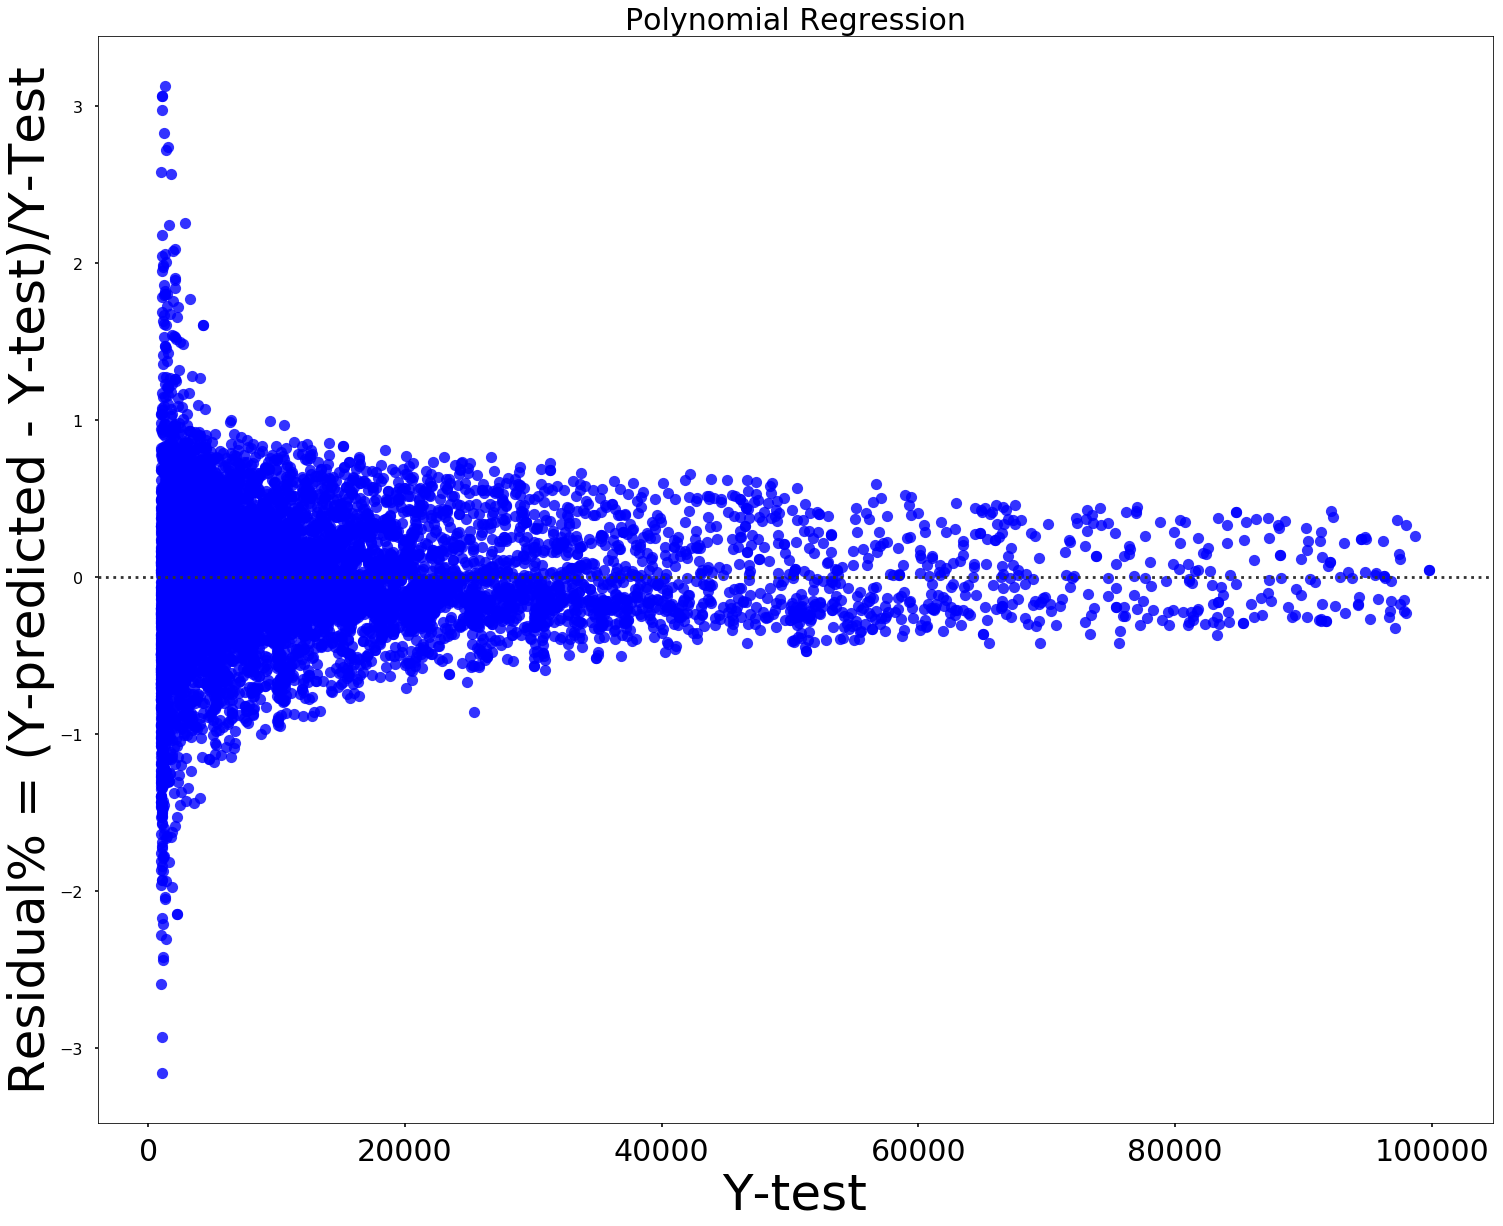

In [71]:
#define range of data
data_r=data[data['pledge_perc']>100]
data_r=data_r[data_r['pledge_perc']<500]
data_r=data_r[data_r['usd_pledged']>=1000]
data_r=data_r[data_r['usd_pledged']<=100000]
print(len(data_r))
corr_df=data_r.corr()
cor_st=corr_df.loc['usd_pledged']
print(cor_st.nsmallest(15).index)
print('')
print(cor_st.nlargest(25).index)

#define parameters for regression
y = data_r [['usd_pledged']]
X = data_r[['country_GB',
       'Last_Week','Last_Month',
       'Last_Year','Last_6_Month',
       'mean_goal_in_category_last_year',
       'median_goal_in_category_last_year',
       'mean_pladge_in_category_last_year',
       'median_pladge_in_category_last_year',
       'mean_pladgePerc_in_category_last_year',
       'median_pladgePerc_in_category_last_year',
       'goal_ratio',
       'name_len','deadline_yr', 'launched_at_yr',
       'name_non_character', 'goal',
       'deadline_hr', 'goal_1000','country_US', 'launched-created',
       'category.slug_music','category.slug_design','category.slug_technology','category.name_Science Fiction', 
       'category.slug_publishing', 'blurb_number_of_word', 'blurb_vowel_ratio']]
#split to train and test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state=8)

# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=2)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)

# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_train_p, y_train)

# Obtain coefficients
#lg.coef_

# Predict
y_test_pred_numeric_p=lg.predict(X_test_p)

print(r2_score(y_test, y_test_pred_numeric_p))

plt.subplots(figsize=(25,20))
ax= sns.residplot(y_test, (y_test-y_test_pred_numeric_p)/y_test, color="b")
sns.set_context("poster", rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":40,'xtick.labelsize': 16.0})
ax.set(xlabel='Y-test', ylabel='Residual% = (Y-predicted - Y-test)/Y-Test',title="Polynomial Regression")